<a href="https://colab.research.google.com/github/pmargarete/CCDATSCL_ASSIGNMENTS/blob/main/DS_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

In this activity, you will work with the New York City Airbnb Open Data—a popular, messy, and highly realistic dataset used by data analysts and data scientists around the world. The dataset includes thousands of Airbnb listings along with details about hosts, locations, prices, reviews, and more.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR8Pmq3Gv7y7z_2Xun-OqMIk43kd5u0TXEatw&s"/>


To guide your work, you will follow the 6-Step Data Wrangling Process, a professional workflow used in industry:

- Discovering. Become familiar with the data by exploring its structure and observing patterns.

- Structuring. Fix issues related to format, column types, indices, and duplicated records.

- Cleaning. Handle missing values, outliers, and inconsistencies so the dataset becomes trustworthy.

- Enriching. Add new features, aggregate information, and enhance the dataset for deeper insights.

- Validating. Apply rule-based checks to ensure the data meets quality standards.

- Publishing. Export and prepare the cleaned dataset for downstream analysis or reporting.
Throughout this exercise, you will answer questions and fill in code cells based on these six steps. You will mimic what professional data scientists do when preparing data for business intelligence dashboards, machine learning models, or exploratory analysis.

In [190]:
import kagglehub
import os
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.
Path to dataset files: /kaggle/input/new-york-city-airbnb-open-data
True


## A. Discovering


Display the first 10 rows

In [191]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Display the column names:

In [192]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Display the dataframe shape:

In [193]:
df.shape

(48895, 16)

Identify the numerical features:

In [194]:
numerical = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical Values:", numerical)

Numerical Values: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


Identify the categorical features

In [195]:
categorical = df.select_dtypes(include='object').columns.tolist()
print("Categorical Values:", categorical)

Categorical Values: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


What are the top 5 questions this dataset might help answer?

# put your answer here
1. Which room type suits better if my budget should not exceed the average?
2. Is living in neighborhood Brooklyn more costly than living in Queens?
3. If my family and I want to tour in Manhattan for 3 days, how much is the least money to expect?

## B. Structuring

Check if the dataset has proper column types

In [196]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Check if the dataset has index issues

In [197]:
df.index


RangeIndex(start=0, stop=48895, step=1)

In [198]:
if df.index.equals(pd.RangeIndex(start=0, stop=len(df), step=1)):
    print("The DataFrame has a default integer index.")
else:
    print("The DataFrame has a custom or non-default index.")

The DataFrame has a default integer index.


Check if the dataset has duplicated rows

In [199]:
df.drop_duplicates(inplace = True)

Convert columns to correct types (e.g., dates → datetime).

In [200]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [201]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


Identify at least one structural issue and describe how to fix it.

In [202]:
df['last_review'] = pd.to_datetime(df['last_review'])
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


## C. Cleaning



Check for missing values

In [203]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Check for outliers in `minimum_nights`

In [204]:
print(df['minimum_nights'].describe())

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


Check for invalid values (e.g., price ≤ 0)

In [205]:
invalid_price_count = df[df['price'] <= 0].shape[0]
print(f"Number of invalid price entries (price <= 0): {invalid_price_count}")

Number of invalid price entries (price <= 0): 11


Apply a missing-value strategy (drop, fill, or flag)


In [206]:
df = df.dropna()

In [207]:
missing_values_after_fill = df.isnull().sum()
print("Missing values after filling:")
print(missing_values_after_fill)

Missing values after filling:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


Apply an outlier-handling strategy

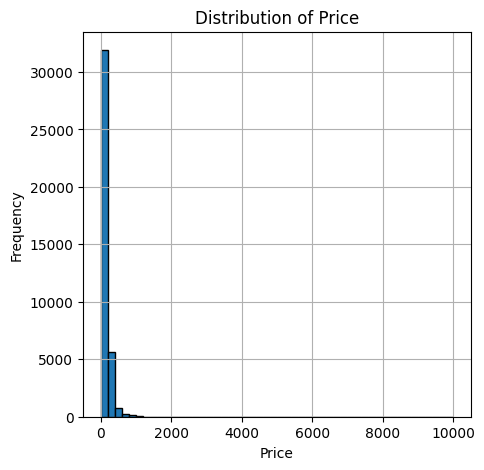

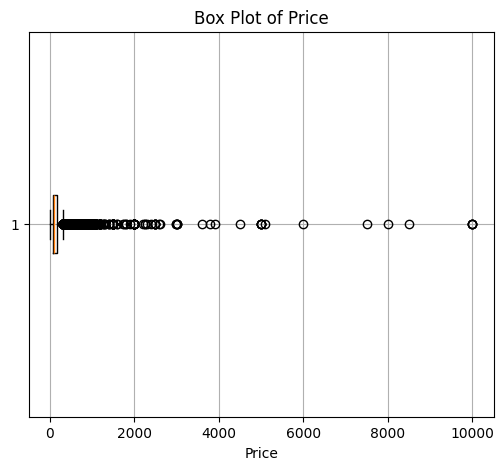

Descriptive statistics for 'price' column:
count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64


In [208]:
# OUTLIER FOR PRICE

import matplotlib.pyplot as plt

# histogram
plt.figure(figsize=(5, 5))
plt.hist(df['price'], bins=50, edgecolor='k')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# box plot
plt.figure(figsize=(6, 5))
plt.boxplot(df['price'], vert=False)
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.grid(True)
plt.show()

# descriptive statistics for the 'price'
print("Descriptive statistics for 'price' column:")
print(df['price'].describe())

## D. Enriching

Create at least 3 new variables:
- price_per_minimum_night
- review_rate_per_month (combine ratings + frequency)
- is_expensive (boolean flag based on price threshold)


In [209]:
df['price_per_minimum_night'] = df['price'] / df['minimum_nights']

In [210]:
df['review_rate_per_month'] = df['number_of_reviews'] * df['reviews_per_month']

In [211]:
mean_price = df['price_per_minimum_night'].mean()
print(mean_price)

65.80581174600002


In [212]:
df['is_expensive'] = df['price'] > mean_price

Create 1 aggregated summary table

(e.g. average price per neighborhood number of hosts per borough)

In [213]:
# Price per night
df.groupby('neighbourhood_group')['price_per_minimum_night'].mean()

,price_per_minimum_night
neighbourhood_group,
Bronx,46.100558
Brooklyn,56.135266
Manhattan,79.984932
Queens,54.009912
Staten Island,48.213141


## E. Validating

Create at least 3 validation checks
- Price must be positive.
- Host ID should not be null.
- Minimum nights must be ≥ 1.
- Generate a validation report:
- Count of rows violating each rule.

Decide if invalid rows (if any) should be removed or corrected?

In [214]:
print(df[df['price'] < 0]) #should show none

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, price_per_minimum_night, review_rate_per_month, is_expensive]
Index: []


In [215]:
df.isnull().sum()
no_null_host_id = df.dropna(subset=['host_id'])
print(no_null_host_id)

             id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group 

In [216]:
print(df[df['minimum_nights'] < 1]) #should show none

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, price_per_minimum_night, review_rate_per_month, is_expensive]
Index: []


## F. Publishing

Select final columns for publication.



In [217]:
#id, name, neighbourhood_group, neighbourhood, room_type, number_of_reviews, last_review, calculated_host_listings_count, availability_365, price_per_minimum_night, review_rate_per_month, is_expensive

In [218]:
selected_columns = ['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'number_of_reviews', 'last_review', 'calculated_host_listings_count', 'availability_365', 'price_per_minimum_night', 'review_rate_per_month', 'is_expensive']
df_final = df[selected_columns]

Export cleaned dataset as "cleaned_airbnb.csv"

In [219]:
df_final.to_csv('cleaned_airbnb.csv', index=False)
print("df_final successfully exported to 'cleaned_airbnb.csv'")

df_final successfully exported to 'cleaned_airbnb.csv'


Export summary reports (e.g., validation or aggregations) as CSV.

In [220]:
hosts_per_borough = df.groupby('neighbourhood_group')['host_id'].nunique().reset_index()
hosts_per_borough.rename(columns={'host_id': 'number_of_unique_hosts'}, inplace=True)
hosts_per_borough.to_csv('hosts_per_borough_summary.csv', index=False)
print("Aggregated report 'hosts_per_borough_summary.csv' exported successfully.")


Aggregated report 'hosts_per_borough_summary.csv' exported successfully.
